# Lab 09-1 MNIST with CNN (Keras)
* MNIST(Modified National Institute of Standards and Technology database)는 0~9까지의 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

### 기본 Library 선언 및 Tensorflow 버전 확인

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.0.0


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

### Hyper Parameters

### Datasets

In [40]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

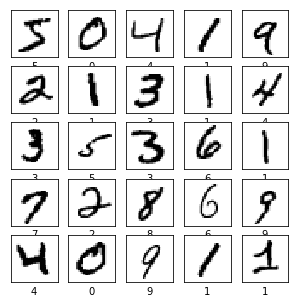

In [43]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

###  Tensorflow Keras
#### 위 Data를 기준으로 CNN분류 모델 생성
* Tensorflow keras API를 통해 모델에 대한 정의

In [47]:
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer과 Cross Entropy Loss 선언

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* 5 Epoch로 학습할 Data로 학습 수행

In [49]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 55s 922us/sample - loss: 0.1242 - accuracy: 0.9614
Epoch 2/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0416 - accuracy: 0.9876
Epoch 3/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0297 - accuracy: 0.9906
Epoch 4/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0231 - accuracy: 0.9927
Epoch 5/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0181 - accuracy: 0.9945


* 모델을 평가할 Test 데이타에 대한 정의

In [46]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3069529571533205, 0.0478]